In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

modules = ["architecture","cli","gui","logic","migrations","model","pdfimport","preferences","styletester","shared","collab","event","external","bst","exporter","importer","specialfields","sql","util"]
versions = ["3-4","3-5","3-6","3-7","3-8","4-0","4-1","4-2","4-3","5-0"]

classMetrics = ["CBO","CSOA","DIT","LCOM","MPC","NOC","OCavg","OPavg","RFC","WMC"]
packageMetrics = ["AC","C","Ca","Ce","D","I","LOC"]

In [30]:
classCollection = {}
classCollectionraw = {}
for v in versions:
    data = pd.read_csv('./metrics/class' + v + ".csv", skiprows=1)
    for mod in modules:
        rows = data[data["Class"].str.contains("jabref." + mod)]
        if(not(rows.empty)):
            classCollection[mod + v] = rows.describe()
            classCollection[mod + v]["Module"] = mod
            classCollection[mod + v]["Version"] = v
            classCollectionraw[mod + v] = rows.fillna(0)
            classCollectionraw[mod + v]["Module"] = mod
            classCollectionraw[mod + v]["Version"] = v

            
# classCollection["gui5-0"].head()

In [31]:
packageCollection = {}
for v in versions:
    data = pd.read_csv('./metrics/package' + v + ".csv", skiprows=1)
    data.fillna(0)
#     print(v)
    for mod in modules:
        rows = data[data["Package"].str.endswith("jabref." + mod, na=False)]
        if(not(rows.empty)):
            rows["Version"] = v
            rows["Module"] = mod
            packageCollection[mod + v] = rows
            
# packageCollection["gui5-0"]

/home/inkaru/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/inkaru/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
modifCollection = {}
modifdata = pd.read_csv("./csv/modifications.csv")
for mod in modules:
    rows = modifdata[modifdata["file_name"].str.contains("jabref." + mod, na=False)]
    if(not(rows.empty)):
        modifCollection[mod] = rows.fillna(0)
        
# modifCollection["gui"]

In [33]:
classdata = pd.concat(classCollection)
packagedata = pd.concat(packageCollection)
modifdata = pd.concat(modifCollection)

classdata.reset_index(level=0,drop=True,inplace=True)
packagedata.reset_index(level=1,drop=True,inplace=True)

# packagedata.head()

In [34]:
def versionEvolClass(metric,measure,mods):
    d = classdata.loc[measure].pivot(index="Version",columns="Module",values=metric)
    for mod in mods:
        plt.plot(versions,d[mod],label=mod)
    plt.title("Modules " + measure + " " + metric + " evolution")
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    return

# versionEvolClass("CBO","mean",["gui","logic"])

In [35]:
def barchartForClass(vers,metric,measure):
    for v in vers:
        d = classdata[classdata["Version"]==v].loc[measure]
        d = d[[metric,"Module"]]
        figarray = d.plot.bar(x="Module",
            subplots=True, 
            figsize=(10,4), 
            title= measure + " measure for version " + v)

# barchartForClass(["5-0","4-0"],"CBO","mean")

In [36]:
def versionEvolPackage(metric,mods):
    d = packagedata.pivot(index="Version",columns="Module",values=metric)
    for mod in mods:
        plt.plot(versions,d[mod],label=mod)
    plt.title("Modules " + metric + " evolution")
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    return

# versionEvolPackage("Ca",["cli","gui"])

In [37]:
def barchartForPackage(vers,metric):
    for v in vers:
        d = packagedata[packagedata["Version"]==v]
        d = d[[metric,"Module"]]
        figarray = d.plot.bar(x="Module",
            subplots=True, 
            figsize=(8,4), 
            title= metric + " for version " + v)

# barchartForPackage(["5-0","4-0"],"I")

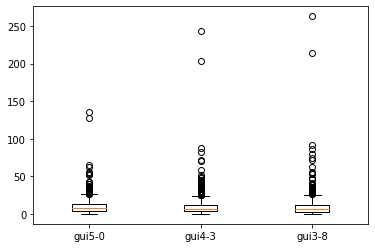

In [39]:
def classBoxPlot(vers,mods,metric):
    dict = {}
    for v in vers:
        for m in mods:
            dict[m+v] = classCollectionraw[m+v][metric]

    fig, ax = plt.subplots()
    ax.boxplot(dict.values())
    ax.set_xticklabels(dict.keys())
    
classBoxPlot(["5-0","4-3","3-8"],["gui"],"CBO")

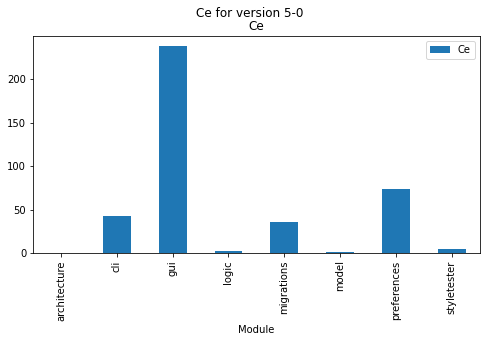

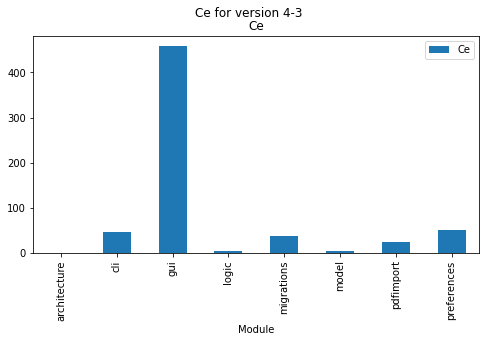

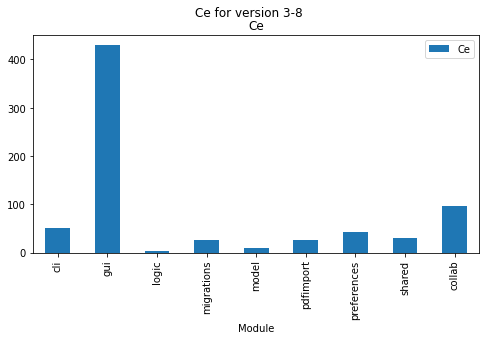

In [40]:
barchartForPackage(["5-0","4-3","3-8"],"Ce")

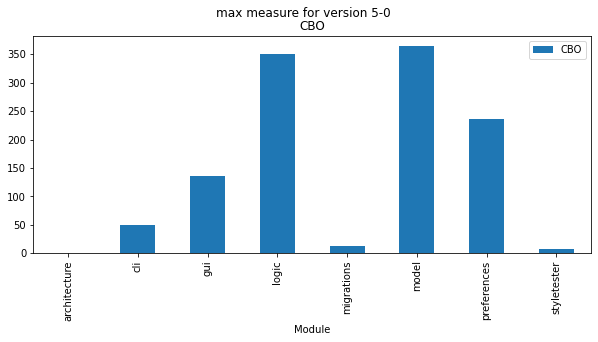

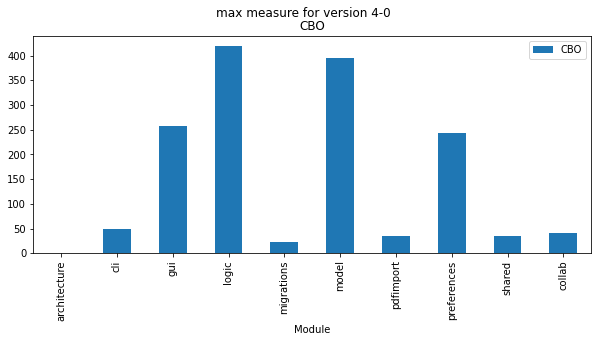

In [41]:
barchartForClass(["5-0","4-0"],"CBO","max")